# Linear Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
train.shape

(1460, 81)

In [ ]:
cols_with_many_missing = ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']
train.drop(cols_with_many_missing, axis = 1, inplace=True)
train.shape

(1460, 76)

In [ ]:
missing=pd.DataFrame(train.isna().sum())
display(missing)

0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
...            ...
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0

[76 rows x 1 columns]

In [ ]:
train['LotFrontage'].fillna((train['LotFrontage'].mean()), inplace=True)
train['Electrical'].fillna('SBrkr',inplace=True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(0.0, inplace = True)
train['BsmtQual'].fillna('TA', inplace = True)
train['BsmtCond'].fillna('TA', inplace = True)
train['BsmtExposure'].fillna('No', inplace = True)
train['BsmtFinType1'].fillna('Unf', inplace = True)
train['BsmtFinType2'].fillna('Unf', inplace = True)
train['GarageType'].fillna('Attchd', inplace = True)
train['GarageYrBlt'].fillna((train['GarageYrBlt'].median()), inplace=True)
train['GarageFinish'].fillna('Unf', inplace = True)
train['GarageQual'].fillna('TA', inplace = True)
train['GarageCond'].fillna('TA', inplace = True)

In [ ]:
df_numerical = train.select_dtypes(exclude='object')
df_object = train.select_dtypes(include='object')
from sklearn.preprocessing import LabelEncoder
df_object = df_object.apply(LabelEncoder().fit_transform)
df_new = pd.concat([df_object,df_numerical],axis=1)
df_new.drop('Id',axis=1, inplace=True)

In [ ]:
df_new

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1455         3       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   
1459         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  WoodDeckSF  \
0             0             5           2           2  ...           0   
1             0            24           1           2  ...         298   
2             0             5           2           2  ...           0   
3             0             6           2           2  ...           0   
4             0            15           2           2  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455          0             8           2           2  ...           0   
1456          0            14           2           2  ...         349   
1457          0             6           2           2  ...           0   
1458          0            12           2           2  ...         366   
1459          0             7           2           2  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 75 columns]

# above divide line

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f248e27ca30>,
      dtype=object)

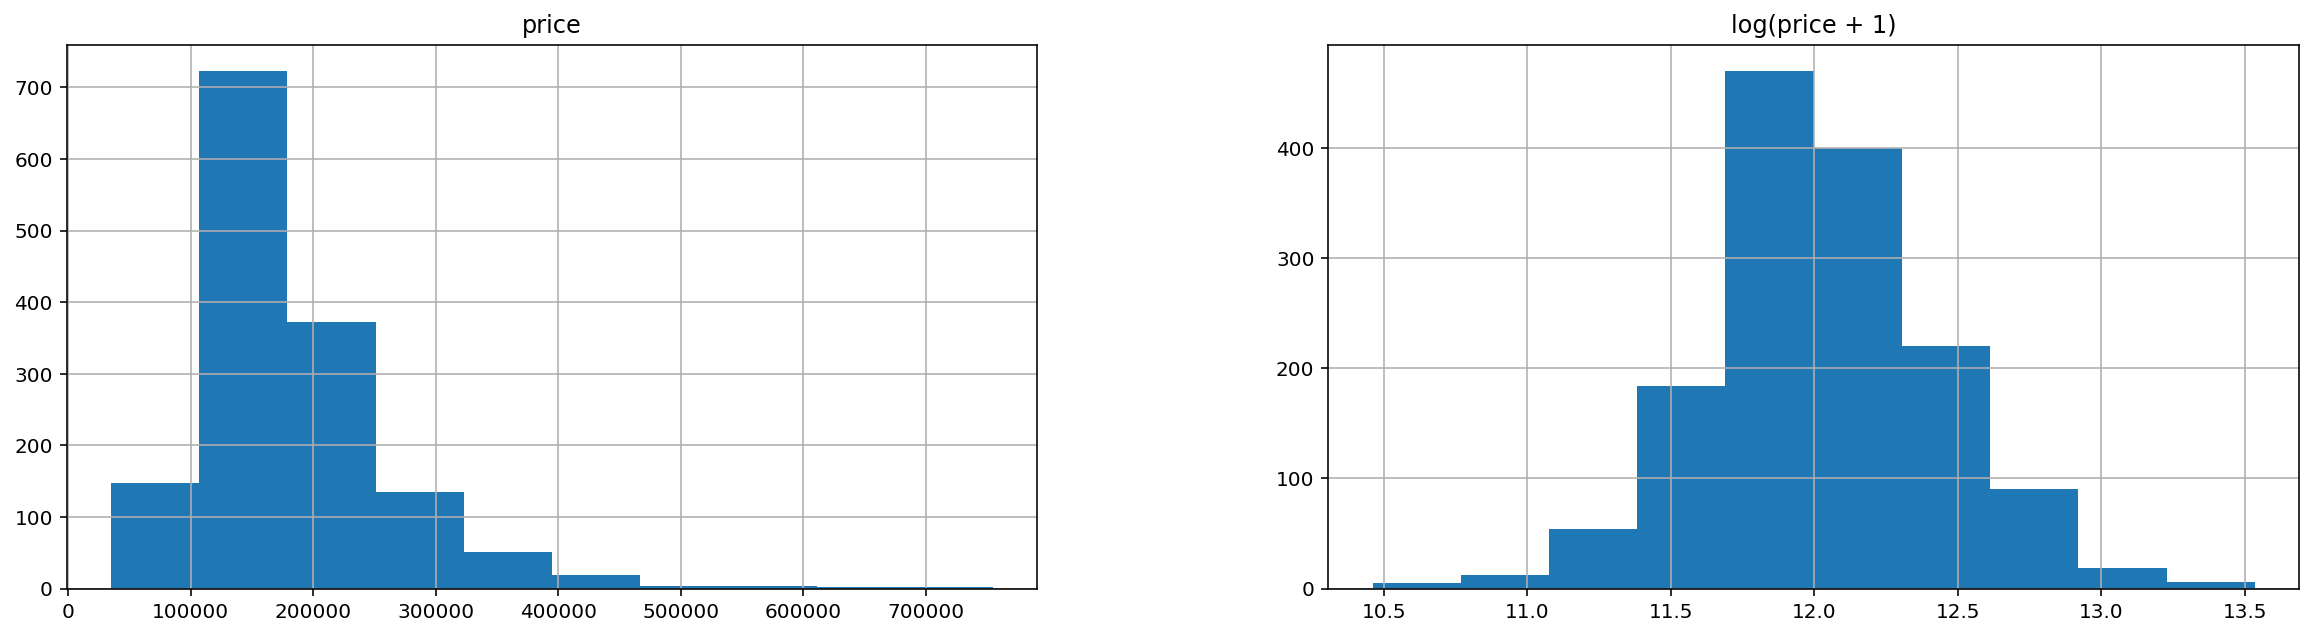

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)
prices = pd.DataFrame({"price":df_new["SalePrice"], "log(price + 1)":np.log1p(df_new["SalePrice"])})
prices.hist()

In [ ]:
df_new_train = df_new.copy(deep=True)

In [ ]:
Y = df_new_train['SalePrice']
df_new_train.drop('SalePrice', axis=1, inplace=True)
X = df_new_train
X_new = X.copy(deep=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X_new.columns)

In [ ]:
#Y = np.log1p(Y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7)

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)
len(model_lasso.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5581964653.250488, tolerance: 517110900.94988227
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5581949388.912109, tolerance: 517110900.94988227
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4825946379.8125, tolerance: 540603892.9540234
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning

74

In [ ]:
name = df_new_train.columns.values.tolist()
name_arr = np.array(name)
cof_data = pd.DataFrame({'Feature':name_arr,'Coefficients':model_lasso.coef_})
cof_data

Feature  Coefficients
0      MSZoning   -771.945930
1        Street   1007.548581
2      LotShape  -2571.201202
3   LandContour   5393.973005
4     Utilities  -1309.332685
..          ...           ...
69  ScreenPorch   1317.974092
70     PoolArea   -223.455801
71      MiscVal    -58.653066
72       MoSold   -728.250407
73       YrSold  -2030.081615

[74 rows x 2 columns]

In [ ]:
cof = pd.Series(model_lasso.coef_, index = name_arr)
cof

MSZoning       -771.945930
Street         1007.548581
LotShape      -2571.201202
LandContour    5393.973005
Utilities     -1309.332685
                  ...     
ScreenPorch    1317.974092
PoolArea       -223.455801
MiscVal         -58.653066
MoSold         -728.250407
YrSold        -2030.081615
Length: 74, dtype: float64

In [ ]:
imp_coef = pd.concat([cof.sort_values().head(10),
                     cof.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

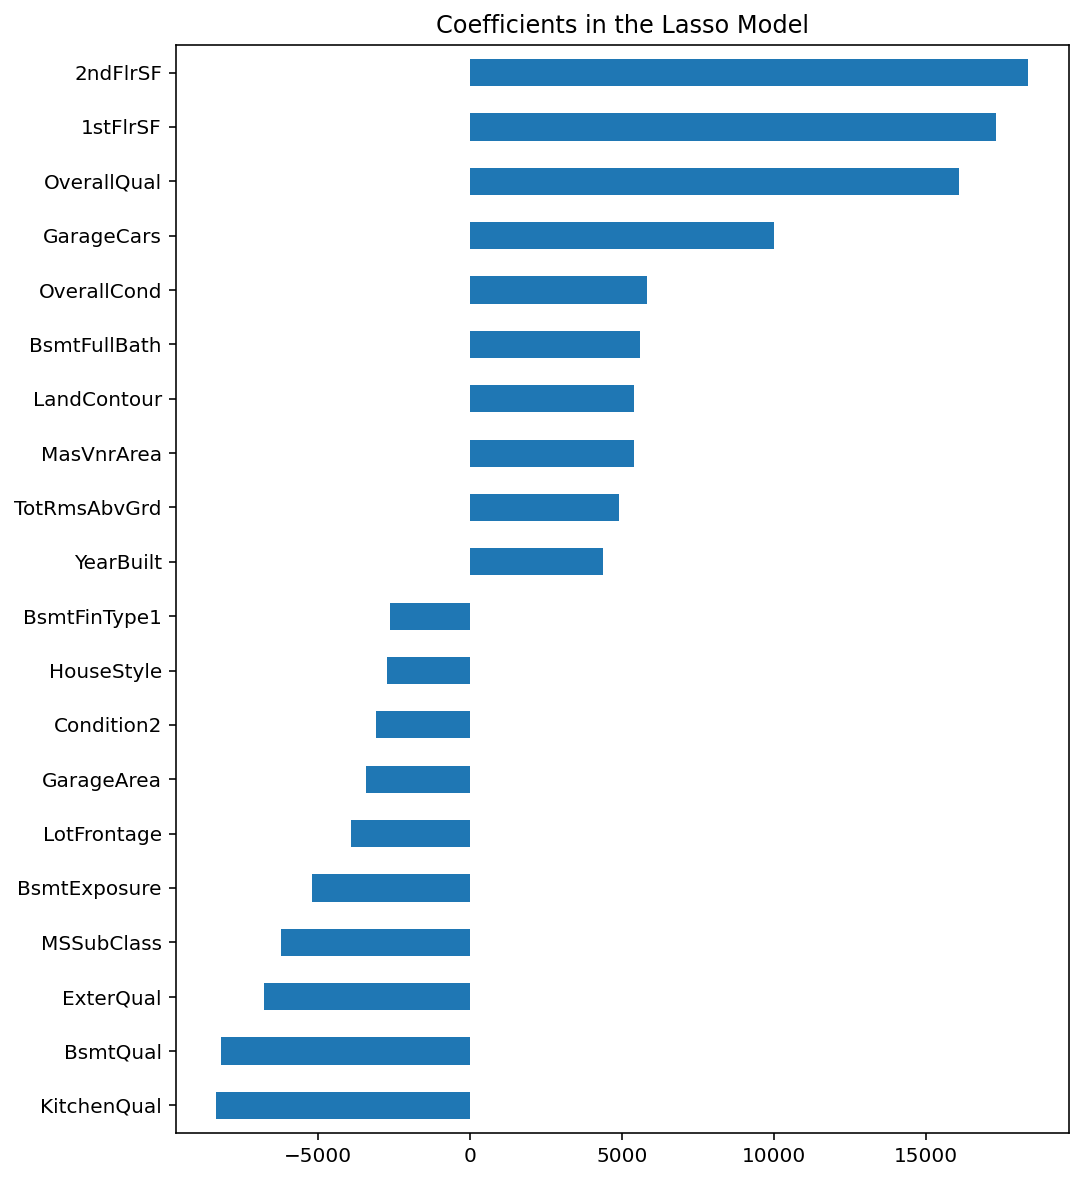

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

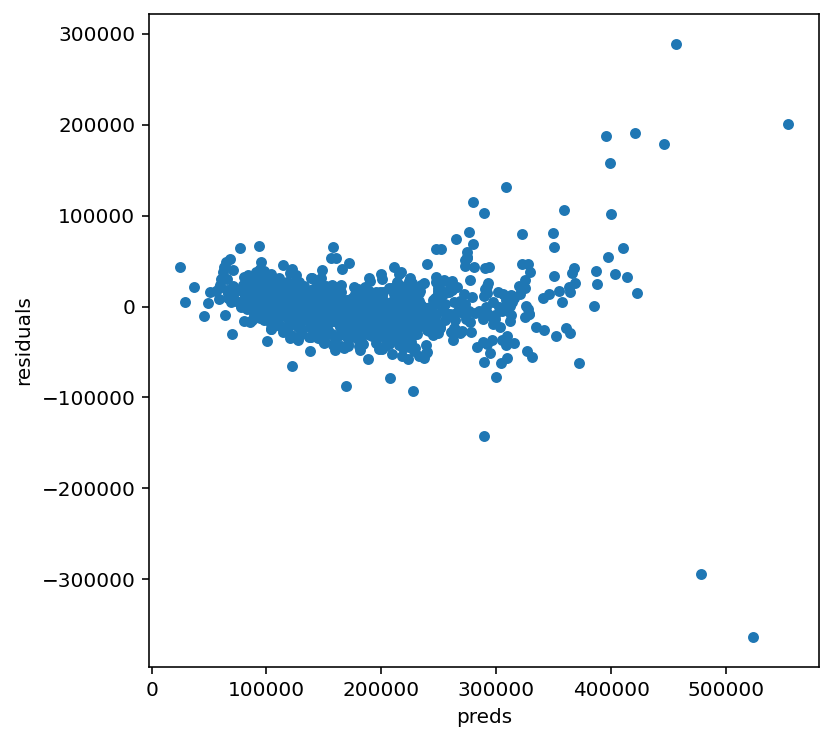

In [ ]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

# after divide line

In [ ]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2485771940>,
      dtype=object)

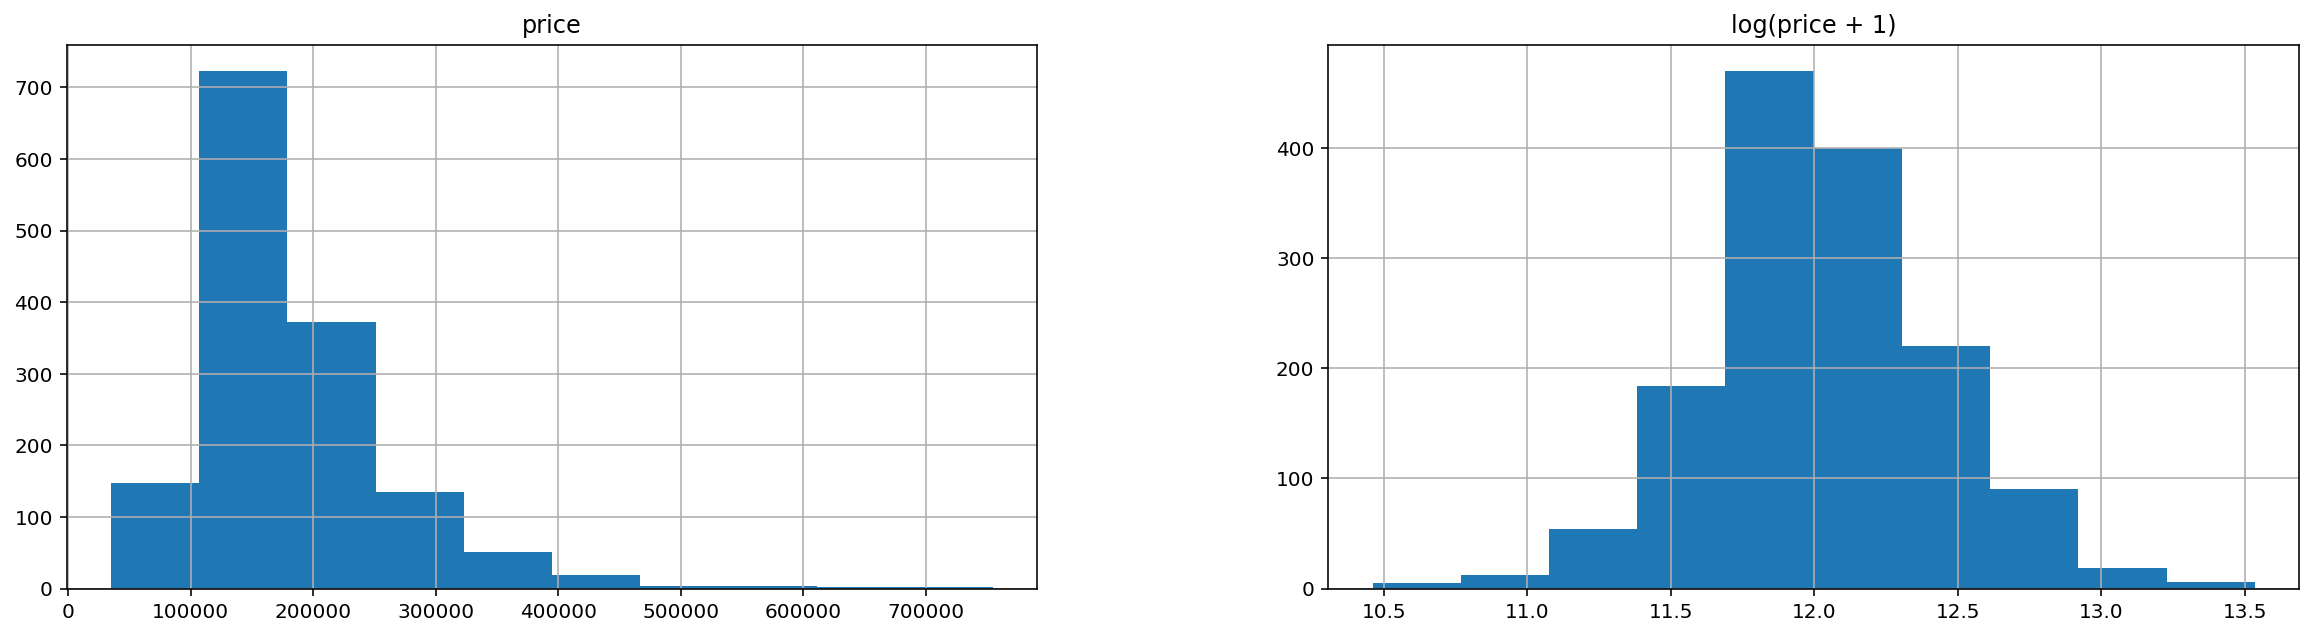

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)
prices = pd.DataFrame({"price":df_new["SalePrice"], "log(price + 1)":np.log1p(df_new["SalePrice"])})
prices.hist()

In [ ]:
#log transform the target:
df_new["SalePrice"] = np.log1p(df_new["SalePrice"])

#log transform skewed numeric features:
numeric_feats = df_new.dtypes[df_new.dtypes != "object"].index

skewed_feats = df_new[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_new[skewed_feats] = np.log1p(df_new[skewed_feats])

In [ ]:
#creating matrices for sklearn:
X_train = df_new[:df_new.shape[0]]
X_test = df_new[df_new.shape[0]:]
y = df_new.SalePrice

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
model_ridge = Ridge()

In [ ]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]

Text(0, 0.5, 'rmse')

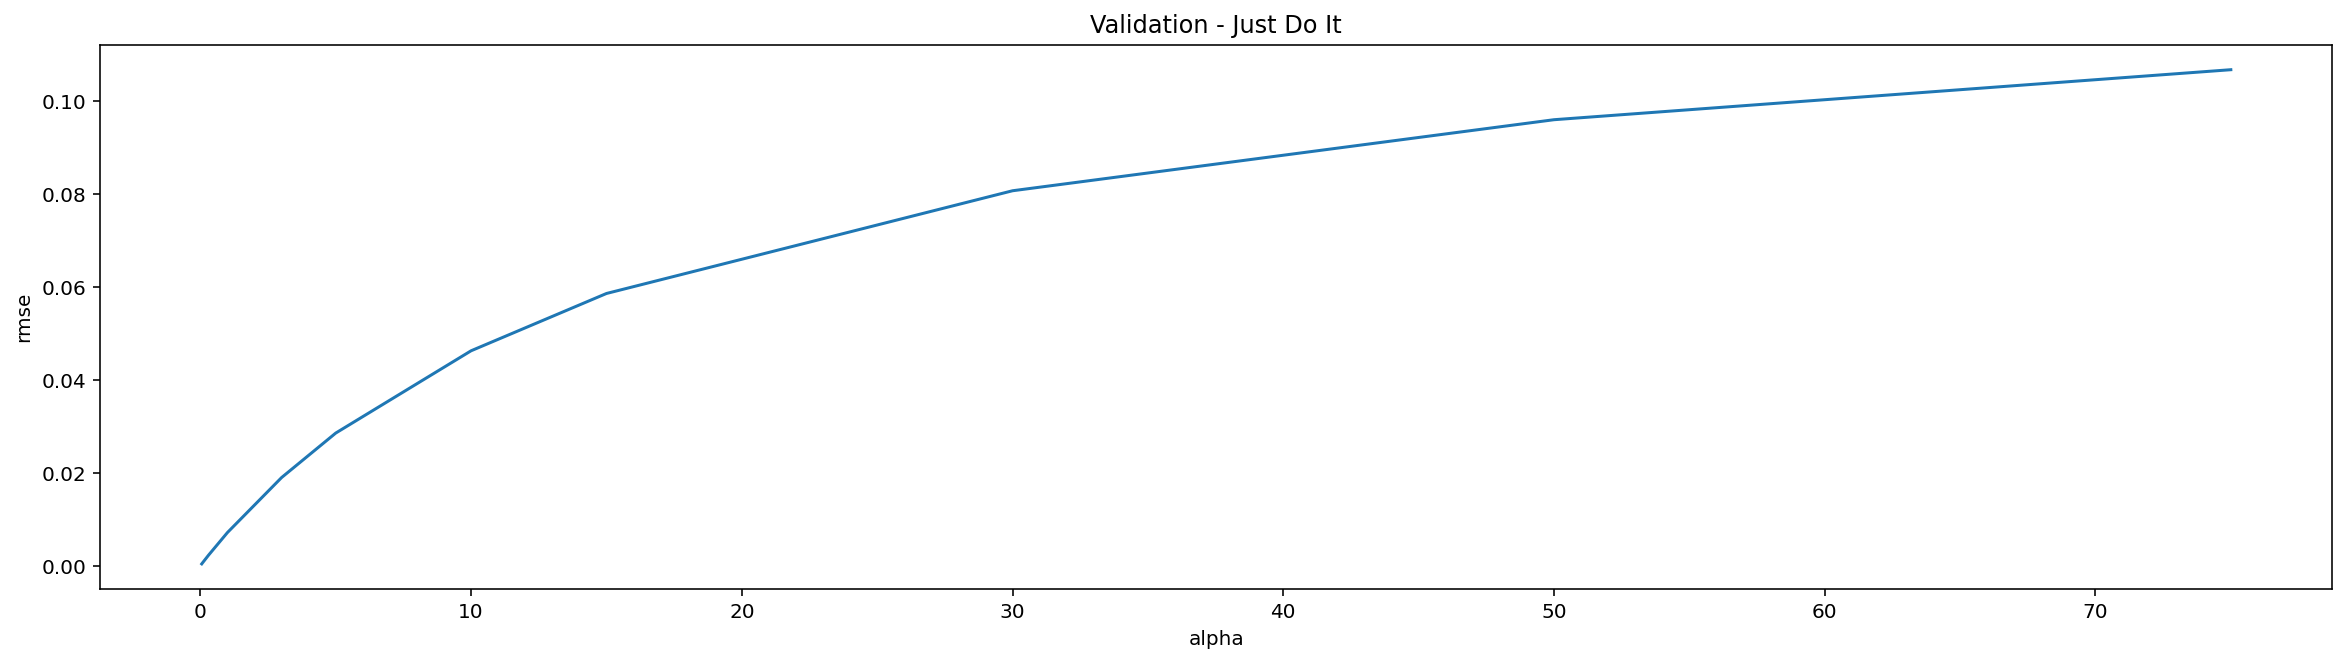

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
cv_ridge.min()

0.0003822423004023742

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [ ]:
rmse_cv(model_lasso).mean()

0.0023285893658334307

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 61 variables


In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

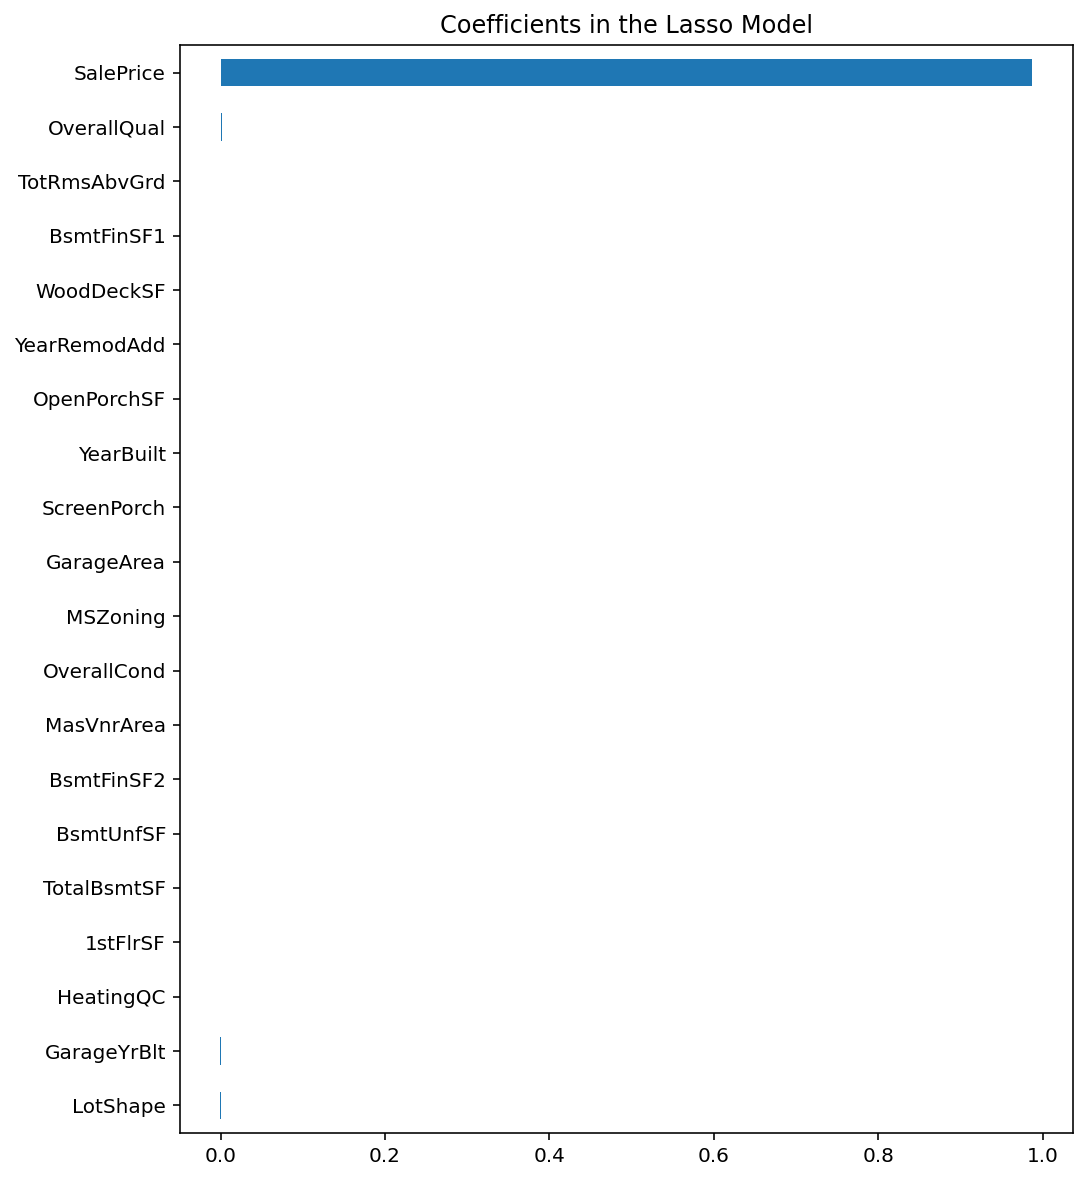

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

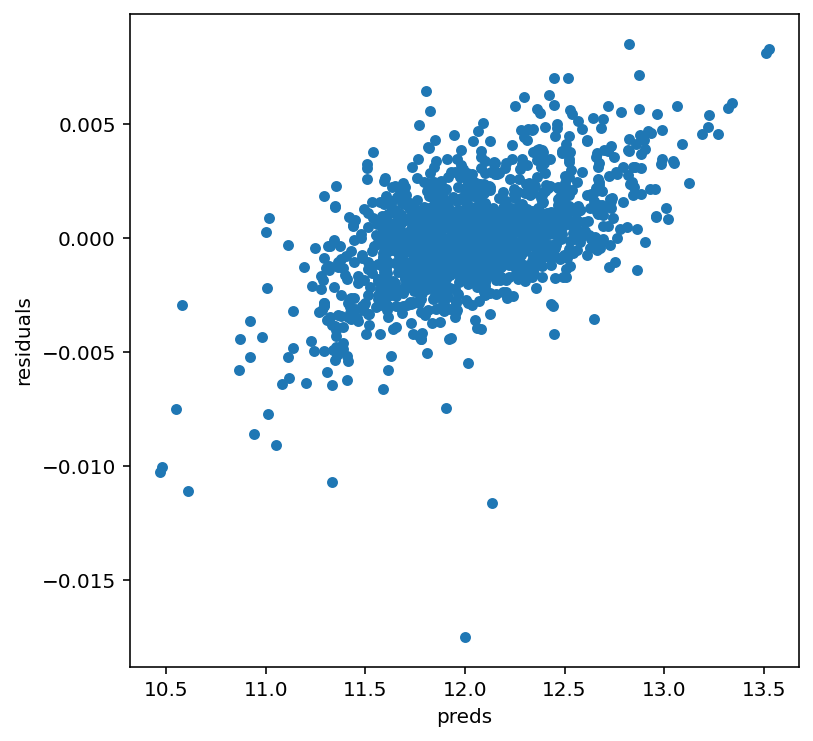

In [ ]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

# XGB

In [ ]:
from prettytable import PrettyTable
def build_table(headers, rows, align="l", add_sl_no=False):
    if isinstance(rows, pd.Series):
        rows = list(rows.iteritems())

    table = PrettyTable(align=align)

    if add_sl_no:
        table.field_names = ["Sl. No."] + list(headers)
        table.align["Sl. No."] = "r"
        rows = [[idx + 1] + list(row) for idx, row in enumerate(rows)]
    else:
        table.field_names = headers

    table.add_rows(rows)
    return table

In [ ]:
def get_corr_mat(df, target):
    """
    Function to return:
        1. Correlation matrix sorted by target value in descending order.
        2. Variance of random variables reset to zero.
    """

    corr_mat = df.corr()
    for col_name in corr_mat.columns.tolist():
        # Reset variance to zero.
        corr_mat.loc[col_name, col_name] = 0

    return corr_mat.drop(target).sort_values(by=target, ascending=False)

In [ ]:
corr = get_corr_mat(df_new, "SalePrice")
corr

MSZoning    Street  LotShape  LandContour  Utilities  LotConfig  \
OverallQual  -0.160099  0.058823 -0.190497     0.028907  -0.001881  -0.031086   
GrLivArea    -0.103569  0.051482 -0.177418    -0.040250  -0.005057  -0.075914   
GarageCars   -0.157042 -0.020025 -0.183906     0.045769   0.008161  -0.066967   
GarageArea   -0.189250 -0.047794 -0.160639     0.047626   0.006372  -0.064023   
1stFlrSF     -0.061578  0.004721 -0.180344    -0.026132   0.016146  -0.059830   
...                ...       ...       ...          ...        ...        ...   
HeatingQC     0.134279 -0.053995  0.096248    -0.066276   0.006950  -0.010217   
KitchenQual   0.128976 -0.025307  0.122182     0.030813  -0.010717  -0.010437   
GarageFinish  0.167501 -0.008277  0.231392    -0.084288  -0.007380   0.024764   
BsmtQual      0.128245 -0.028731  0.161208    -0.003311   0.021807   0.022063   
ExterQual     0.200536  0.049976  0.148818    -0.003613   0.017369  -0.002503   

              LandSlope  Neighborhood  Condition1  Condition2  ...  \
OverallQual   -0.066077      0.196593    0.120876    0.045006  ...   
GrLivArea      0.036451      0.158034    0.046280    0.004191  ...   
GarageCars    -0.001472      0.194063    0.117615    0.031468  ...   
GarageArea     0.005405      0.213578    0.087307    0.063664  ...   
1stFlrSF       0.069387      0.175013    0.066442    0.031417  ...   
...                 ...           ...         ...         ...  ...   
HeatingQC      0.033914     -0.038039   -0.098121   -0.027252  ...   
KitchenQual   -0.001072     -0.128734   -0.071007   -0.046992  ...   
GarageFinish   0.025988     -0.067240   -0.174352   -0.020146  ...   
BsmtQual       0.009262     -0.159363   -0.129950    0.006772  ...   
ExterQual      0.019839     -0.151595   -0.094417   -0.042865  ...   

              WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
OverallQual     0.283256     0.445101      -0.158648   0.027546     0.049983   
GrLivArea       0.218770     0.394999      -0.048336   0.033182     0.090308   
GarageCars      0.252437     0.335919      -0.198719   0.033975     0.036023   
GarageArea      0.226050     0.330992      -0.171380   0.031656     0.040207   
1stFlrSF        0.200377     0.244062      -0.113931   0.058601     0.102452   
...                  ...          ...            ...        ...          ...   
HeatingQC      -0.168612    -0.304693       0.107212  -0.063189     0.060051   
KitchenQual    -0.198214    -0.308425       0.095458  -0.019255    -0.023040   
GarageFinish   -0.289784    -0.359954       0.221930  -0.034299    -0.026172   
BsmtQual       -0.264808    -0.354242       0.165054  -0.016788     0.006440   
ExterQual      -0.225038    -0.371823       0.143942  -0.045132    -0.000018   

              PoolArea   MiscVal    MoSold    YrSold  SalePrice  
OverallQual   0.072651 -0.085131  0.070815 -0.027347   0.817185  
GrLivArea     0.118608 -0.035625  0.066083 -0.030975   0.730254  
GarageCars    0.021554 -0.056965  0.040522 -0.039117   0.680625  
GarageArea    0.070400 -0.035492  0.027974 -0.027378   0.650888  
1stFlrSF      0.098952 -0.042057  0.048757 -0.019273   0.608955  
...                ...       ...       ...       ...        ...  
HeatingQC     0.024678  0.026451 -0.001753  0.008846  -0.425906  
KitchenQual  -0.063480  0.065960 -0.038072 -0.009706  -0.534387  
GarageFinish -0.031125  0.022041  0.006083 -0.004743  -0.574119  
BsmtQual     -0.033192  0.060771 -0.006646  0.025285  -0.578729  
ExterQual    -0.038822  0.025144 -0.024720 -0.036300  -0.582164  

[74 rows x 75 columns]

In [ ]:
table = build_table(headers=["Feature", "Score"], rows=corr["SalePrice"][:10], add_sl_no=True)
display(table)

+---------+--------------+--------------------+
| Sl. No. | Feature      | Score              |
+---------+--------------+--------------------+
|       1 | OverallQual  | 0.8171846144867677 |
|       2 | GrLivArea    | 0.7302537651626396 |
|       3 | GarageCars   | 0.6806248726581888 |
|       4 | GarageArea   | 0.650887681143594  |
|       5 | 1stFlrSF     | 0.6089550420477832 |
|       6 | FullBath     | 0.5947706649972533 |
|       7 | YearBuilt    | 0.586570192789716  |
|       8 | YearRemodAdd | 0.5656077814623218 |
|       9 | TotRmsAbvGrd | 0.5344224002094399 |
|      10 | GarageYrBlt  | 0.4957939015604326 |
+---------+--------------+--------------------+

Feature: 0, Score: 0.00112
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00994
Feature: 3, Score: 0.00010
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00035
Feature: 6, Score: 0.00048
Feature: 7, Score: 0.00560
Feature: 8, Score: 0.00002
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00090
Feature: 11, Score: 0.00036
Feature: 12, Score: 0.00109
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00017
Feature: 15, Score: 0.00117
Feature: 16, Score: 0.00057
Feature: 17, Score: 0.00014
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00222
Feature: 21, Score: 0.00406
Feature: 22, Score: 0.00935
Feature: 23, Score: 0.00442
Feature: 24, Score: 0.00025
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00042
Feature: 27, Score: 0.00051
Feature: 28, Score: 0.00002
Feature: 29, Score: 0.00372
Feature: 30, Score: 0.00015
Feature: 31, Score: 0.00522
Feature: 32, Score: 0.00014
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score: 0.00132
Fe

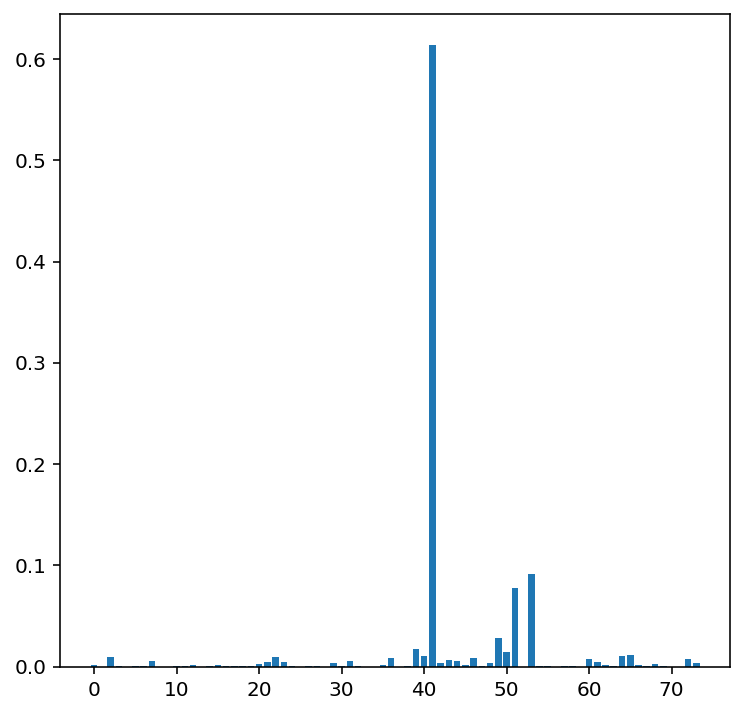

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
x_train['OverallQual']

308    -1.518467
98     -0.795151
1272   -0.795151
250    -2.241782
54     -0.795151
          ...   
479    -1.518467
176    -0.071836
807    -0.795151
1184   -0.795151
1406   -0.795151
Name: OverallQual, Length: 1021, dtype: float64

In [ ]:
y_train

308      82500
98       83000
1272    137000
250      76500
54      130000
         ...  
479      89471
176     211000
807     223500
1184    186700
1406    133000
Name: SalePrice, Length: 1021, dtype: int64

# Non-linear

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm, datasets

In [ ]:
k_folds = KFold(n_splits=10)
DTML = DecisionTreeRegressor()
DTML.fit(x_train, y_train)
DT_scores = cross_val_score(DTML, x_train, y_train, cv = k_folds, scoring = 'neg_root_mean_squared_error')

print(DT_scores)
print(DT_scores.mean())

[-37915.5660915  -34685.5262303  -39502.52280588 -47025.23176007
 -39266.24983392 -39805.71104397 -38983.94053614 -33426.56851175
 -49887.01269103 -38606.30727068]
-39910.463677523876


In [ ]:
y_test_list = y_test.tolist()


In [ ]:
# 跟真實值的差距 最後用1-error 拿出分數來
dt_prediction = DTML.predict(x_test)
error = 0

for i in range(0,len(y_test)):
  error = error + abs(y_test_list[i] - dt_prediction[i])
score = 1 - (error / sum(y_test_list))
print('the score of DTML is',score)

the score of DTML is 0.8615014771644127


In [ ]:
k_folds = KFold(n_splits=10)
RFML = RandomForestRegressor(random_state=1)
RFML.fit(x_train, y_train)
RF_scores = cross_val_score(RFML, X, Y, cv = k_folds, scoring = 'neg_root_mean_squared_error')
print(RF_scores)
print(RF_scores.mean())

[-24933.43389423 -25560.96421674 -22321.89106872 -39422.99563266
 -32529.1067412  -26062.03203579 -23658.71992699 -24048.04261183
 -43538.70659698 -27846.26379501]
-28992.21565201575


In [ ]:
k_folds = KFold(n_splits=10)
KNNML = KNeighborsRegressor()
KNNML.fit(x_train, y_train)
KNN_scores = cross_val_score(KNNML, x_train, y_train, cv = k_folds, scoring = 'neg_root_mean_squared_error')
print(KNN_scores)
print(KNN_scores.mean())

[-41249.82357554 -28769.85684815 -35723.89930022 -41445.12119297
 -41510.88292908 -30278.71677558 -31244.12348361 -49352.40956425
 -43868.05401308 -68491.14746153]
-41193.40351440097


In [ ]:
RFML.score(x_test,y_test)

0.8885873845774908

In [ ]:
from seaborn.algorithms import bootstrap
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1400, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,6]
min_samples_split = [2,6]
min_samples_leaf = [2,6]
bootstrap = [True, False]
oob_scorebool = [True, False]
param_gird = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_gird)

{'n_estimators': [100, 244, 388, 533, 677, 822, 966, 1111, 1255, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6], 'min_samples_split': [2, 6], 'min_samples_leaf': [2, 6], 'bootstrap': [True, False]}


In [ ]:
'''from sklearn.model_selection import GridSearchCV
rf_Gird = GridSearchCV(estimator = RFML, param_grid=param_gird, cv=10,verbose=2,n_jobs=5)
rf_Gird.fit(x_train, y_train)
rf_Gird.best_params_'''

'from sklearn.model_selection import GridSearchCV\nrf_Gird = GridSearchCV(estimator = RFML, param_grid=param_gird, cv=10,verbose=2,n_jobs=5)\nrf_Gird.fit(x_train, y_train)\nrf_Gird.best_params_'

In [ ]:
'''print(rf_Gird.score(x_train,y_train))
print(rf_Gird.score(x_test,y_test))'''

'print(rf_Gird.score(x_train,y_train))\nprint(rf_Gird.score(x_test,y_test))'

# Non-linear model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 28.3 MB/s 


In [ ]:
import shap

In [ ]:
X100 = pd.DataFrame(x_train).sample(n=500)

In [ ]:
RFML = RandomForestRegressor(random_state=42)
RFML.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

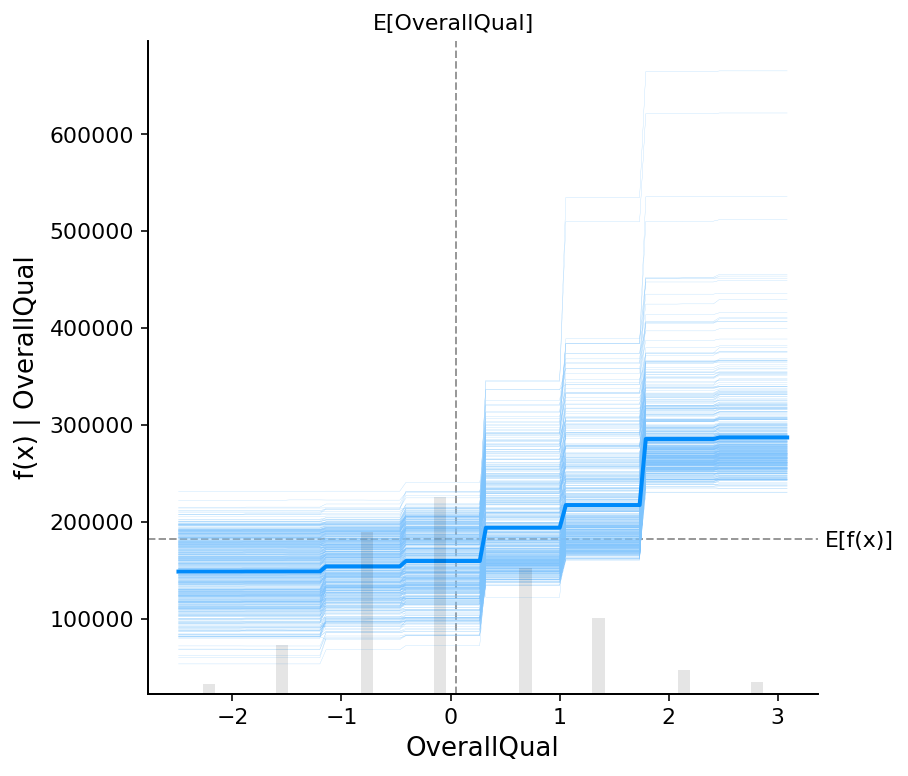

In [ ]:
shap.plots.partial_dependence(
    'OverallQual',
    RFML.predict,
    X100,
    ice=True,
    model_expected_value=True,
    feature_expected_value=True
)

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 73 kB/s 
     |████████████████████████████████| 37.8 MB 1.8 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=29b8425ab7be6b989c3a17b177822b5f0a5915009687b0998813b19467fff1ad
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152158 sha256=a19840bba4d32ba7c37ce48e2b78dfae68c9ffe4e1907184f5c4134c801e9eb8
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=72eb0b5a01b0ec1c88c9fb84abdc15652010176189ca05842fa7d4c651550095
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60

In [ ]:
%load_ext autoreload
%autoreload 2
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):

    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

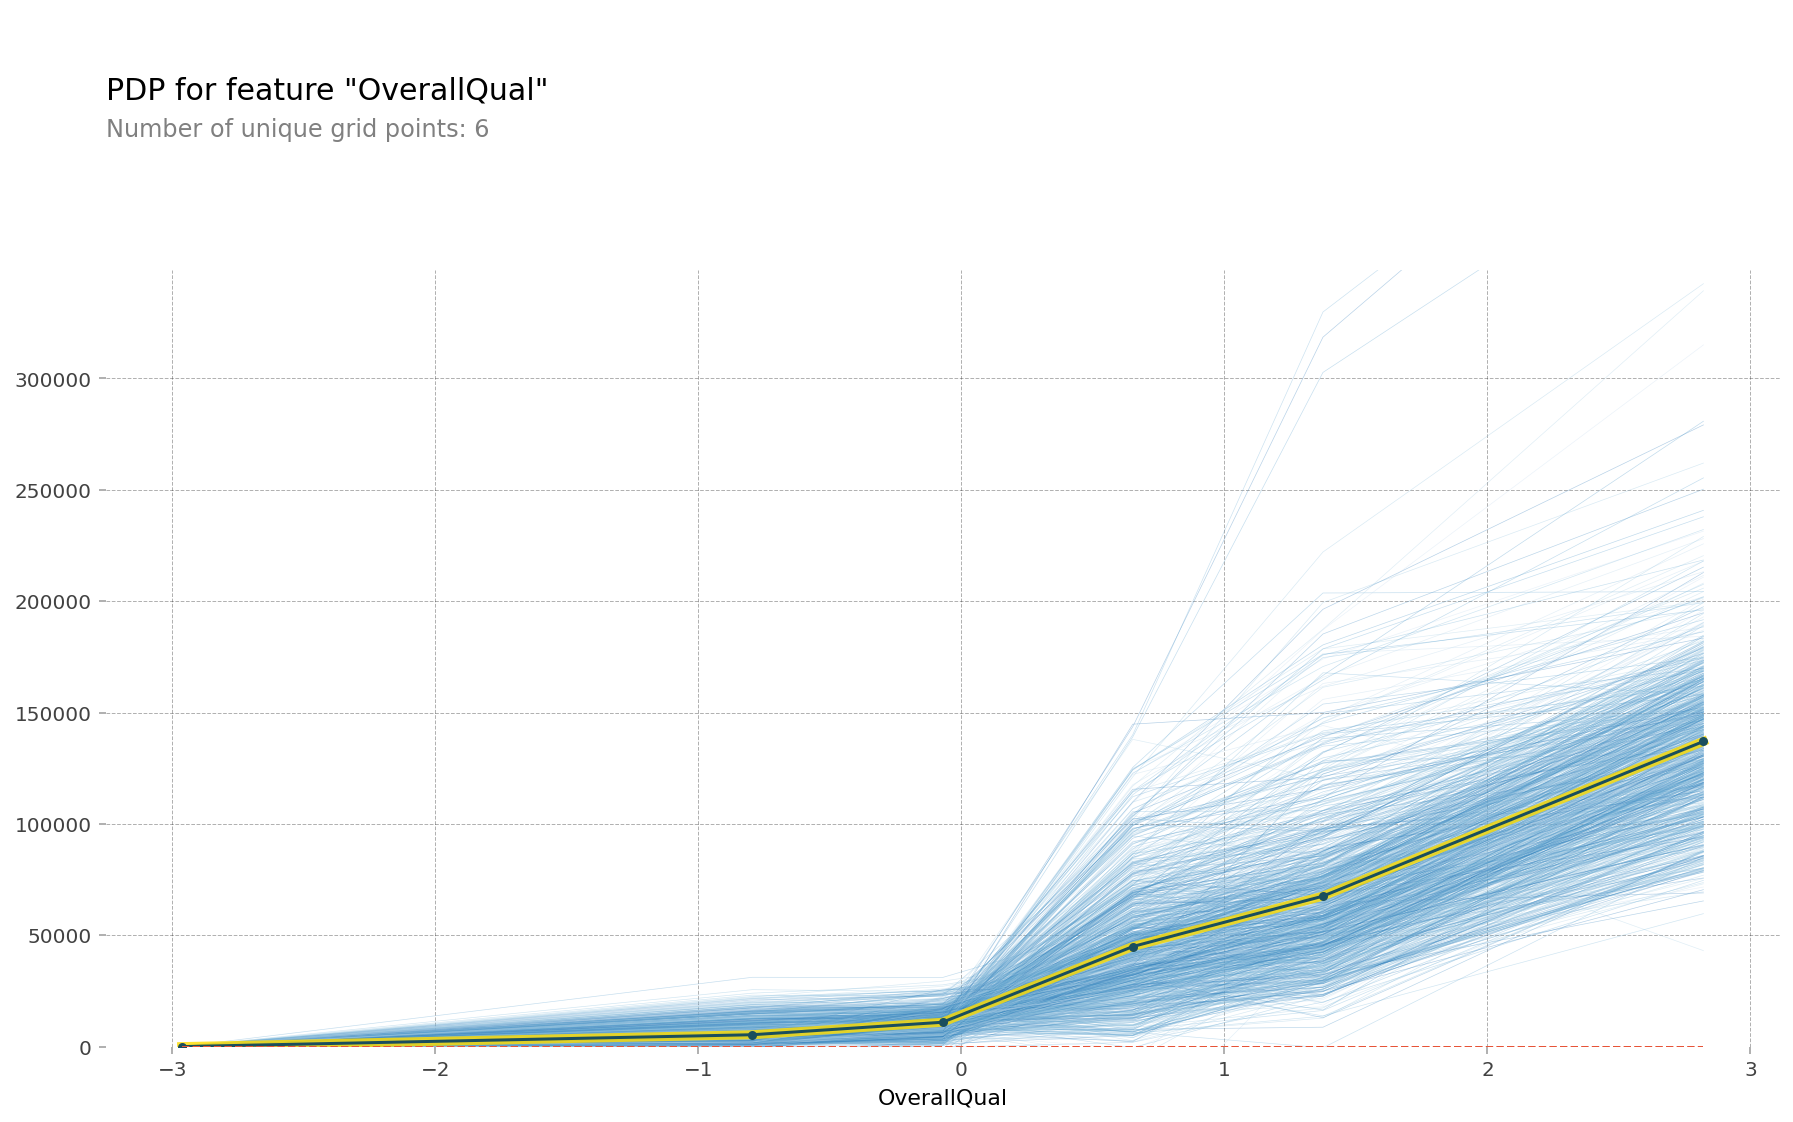

In [ ]:
plot_pdp(RFML,x_train, 'OverallQual', nb_clusters=24, lines_flag=True)# for tommy only

In [ ]:
RFML.predict

<bound method ForestRegressor.predict of RandomForestRegressor(random_state=42)>

### Shapley value

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(RFML)
shap_values = explainer.shap_values(x_test)

In [ ]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

0         1            2          3         4           5   \
434   521.399346  0.291708 -1560.913845  46.615646  0.019480  -52.075408   
435 -1109.865084  0.512472  -529.081525   9.208385  0.059611  152.781222   
436   567.761190  2.116636  -409.602441  39.741670  0.030146   65.922092   
437   848.349197  0.550836   359.961788  -2.915335  0.034853  -36.291242   
438   546.592062  1.392210  -388.047017 -33.040341  0.018439  -38.801265   

             6            7           8         9   ...           64  \
434  121.088436 -1388.530946   40.422166  4.913602  ... -3806.838291   
435  -17.174106  1543.533467  163.669854  8.052730  ... -3894.469474   
436   -2.934176   906.064345   50.998387  7.128122  ...  -327.073565   
437  -43.877992 -1116.562226   34.857357  3.088959  ... -4288.787827   
438   -0.092210  -872.811195   24.570979  2.939768  ...  2374.255798   

              65           66          67         68         69        70  \
434   688.702659  -238.404559  -37.430083  -8.181621 -25.997026 -3.947341   
435  -609.201740  -361.762351 -271.651172 -14.444838 -54.647885 -3.557903   
436  -147.461460  -443.793439   -3.143322  -7.146780 -27.798311 -5.577416   
437   476.113914 -1421.770529   17.720441  -7.370228 -18.759895 -3.238195   
438  1046.581983  -533.088829   72.782248 -18.537890 -54.478166 -7.605603   

            71          72          73  
434 -20.272461  257.915589   -5.697678  
435   9.935320   15.933381  123.117723  
436   7.166772 -187.365069  111.659891  
437  -3.213688 -133.513338 -192.145685  
438   7.482699 -674.662603  163.466330  

[5 rows x 74 columns]

In [ ]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  [180690.47960823]


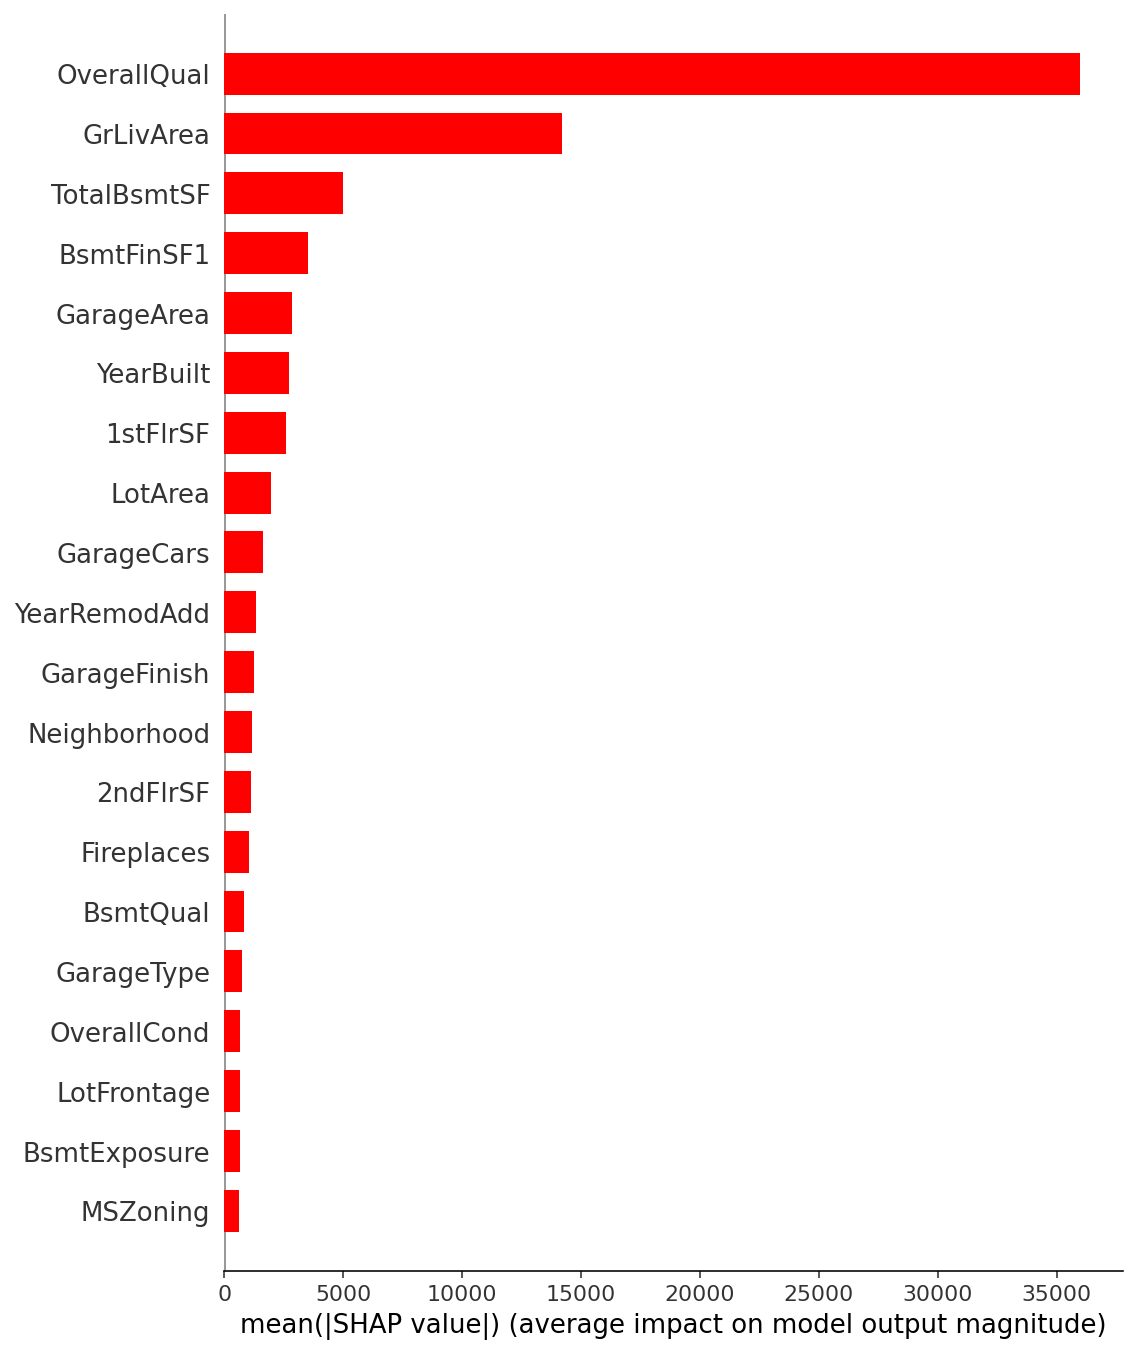

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar", color='red')

In [ ]:
pd.DataFrame(x_test.dtypes)

0
MSZoning     float64
Street       float64
LotShape     float64
LandContour  float64
Utilities    float64
...              ...
ScreenPorch  float64
PoolArea     float64
MiscVal      float64
MoSold       float64
YrSold       float64

[74 rows x 1 columns]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], x_test.iloc[1,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[99,:], x_test.iloc[99,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[88,:], x_test.iloc[88,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[350,:], x_test.iloc[350,:])#for tommy

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], x_test.iloc[:1000,:])

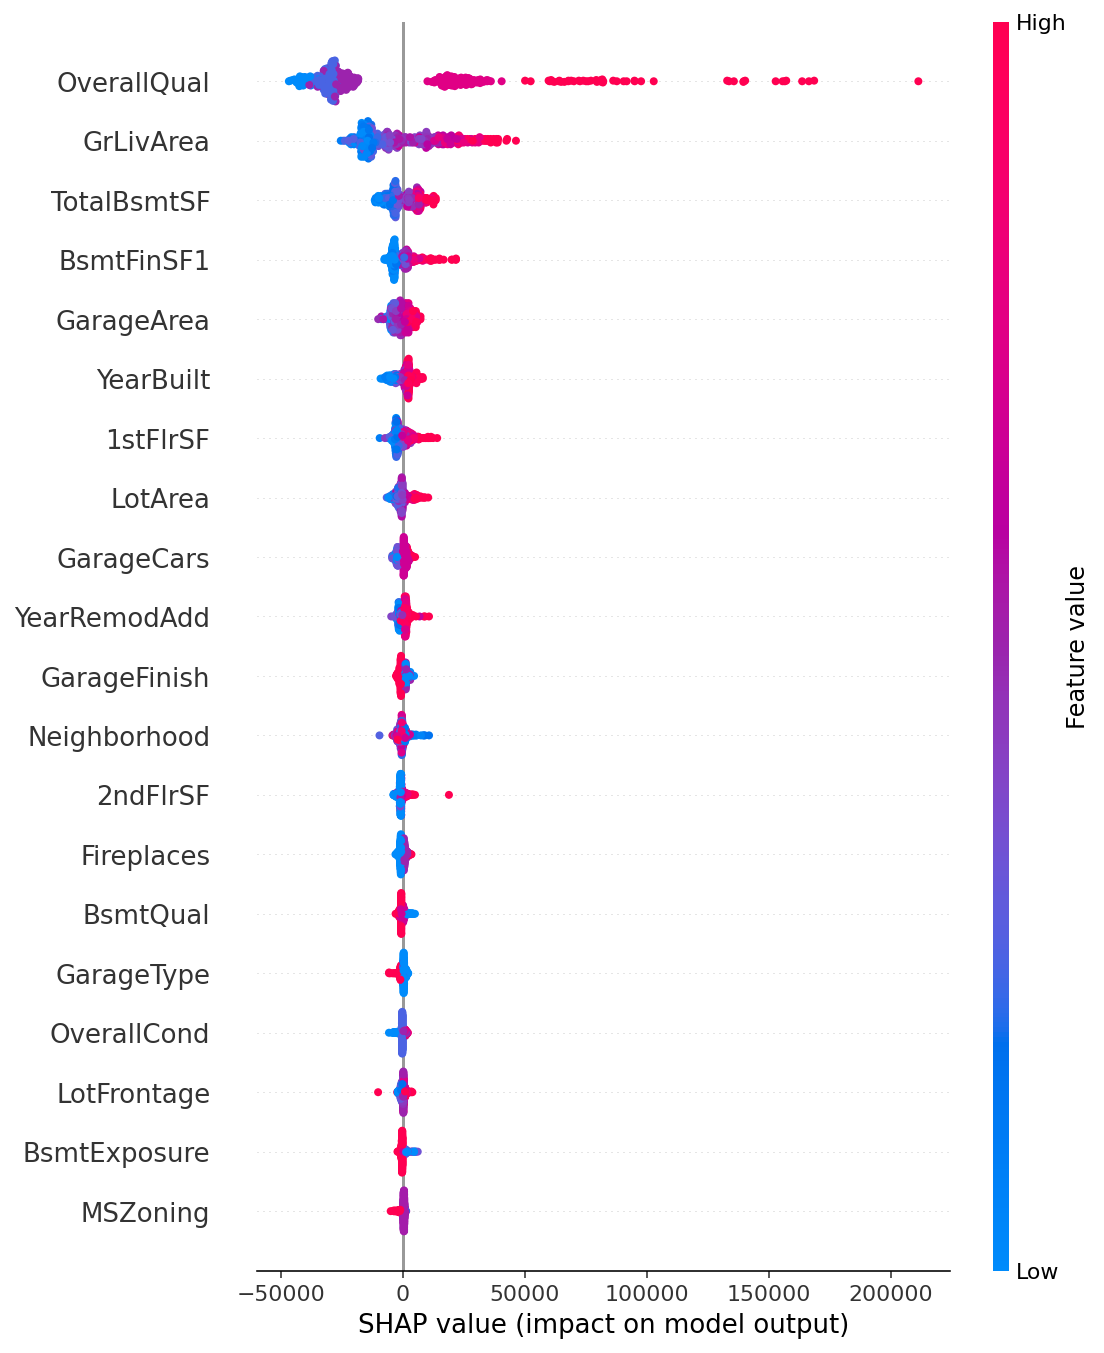

In [ ]:
shap.summary_plot(shap_values, x_test)

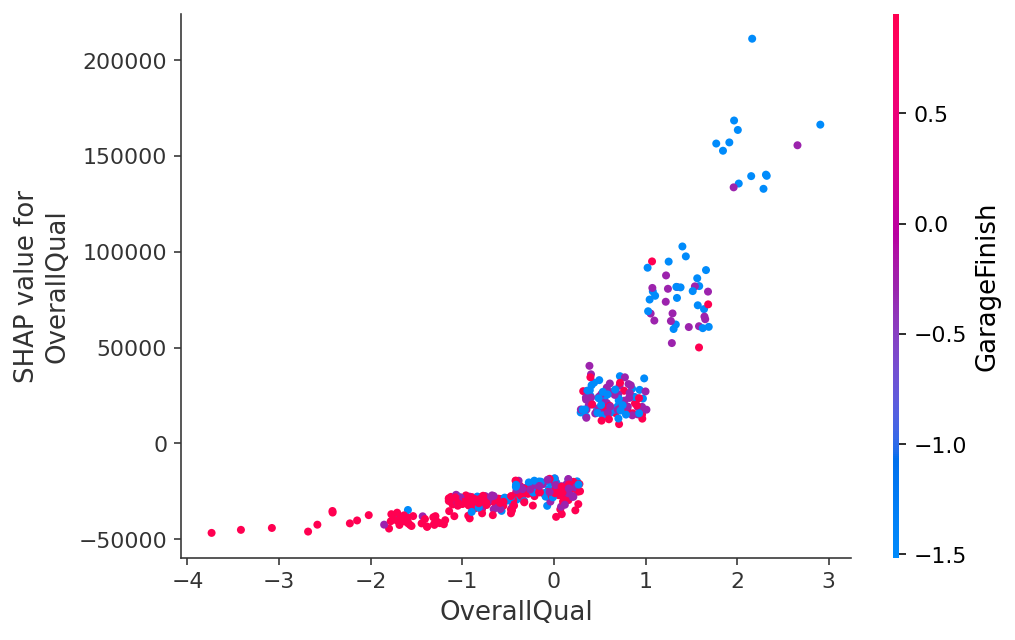

In [ ]:

shap.dependence_plot(ind='OverallQual', interaction_index='GarageFinish',
                     shap_values=shap_values,
                     features=x_test,
                     display_features=x_test,
                     x_jitter=1)

In [ ]:
from seaborn.algorithms import bootstrap
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1400, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,6]
min_samples_split = [1,4]
min_samples_leaf = [2,6]
bootstrap = [True, False]
param_gird = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_gird)

{'n_estimators': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6], 'min_samples_split': [1, 4], 'min_samples_leaf': [2, 6], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Gird = GridSearchCV(estimator = RFML, param_grid=param_gird, cv=10,verbose=2,n_jobs=5)
rf_Gird.fit(x_train, y_train)
rf_Gird.best_params_

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 600}

In [ ]:
print(rf_Gird.score(x_train, y_train))
print(rf_Gird.score(x_test,y_test))

0.9393273915664444
0.8714128823824047
